In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
file = 'U:\Data\Stocks\googl.us.txt'
df=pd.read_csv(file,sep=',')

In [3]:
df = df.sort_values('Date')
# Double check the result
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [4]:
training_set = df.iloc[:, 1:2].values

In [5]:
training_set

array([[  50.   ],
       [  50.505],
       [  55.375],
       ...,
       [1050.05 ],
       [1048.   ],
       [1043.87 ]])

In [6]:
training_set.shape

(3333, 1)

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60, 3333):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train

array([[[4.04815809e-04],
        [9.09586138e-04],
        [5.77737130e-03],
        ...,
        [3.74379657e-02],
        [3.57237457e-02],
        [3.49540959e-02]],

       [[9.09586138e-04],
        [5.77737130e-03],
        [6.02225987e-03],
        ...,
        [3.57237457e-02],
        [3.49540959e-02],
        [4.30004348e-02]],

       [[5.77737130e-03],
        [6.02225987e-03],
        [2.88368792e-03],
        ...,
        [3.49540959e-02],
        [4.30004348e-02],
        [4.06115218e-02]],

       ...,

       [[8.91029582e-01],
        [8.91249481e-01],
        [8.92948708e-01],
        ...,
        [9.92703320e-01],
        [9.99050432e-01],
        [9.99600182e-01]],

       [[8.91249481e-01],
        [8.92948708e-01],
        [8.76985971e-01],
        ...,
        [9.99050432e-01],
        [9.99600182e-01],
        [1.00000000e+00]],

       [[8.92948708e-01],
        [8.76985971e-01],
        [8.75776522e-01],
        ...,
        [9.99600182e-01],
        [1.0000

In [11]:
regressor = Sequential()

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units = 1))

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
3273/3273 [==============================] - 18s 6ms/step - loss: 0.0121
Epoch 2/10
3273/3273 [==============================] - 13s 4ms/step - loss: 0.0022
Epoch 3/10
3273/3273 [==============================] - 14s 4ms/step - loss: 0.0023
Epoch 4/10
3273/3273 [==============================] - 14s 4ms/step - loss: 0.0021
Epoch 5/10
3273/3273 [==============================] - 14s 4ms/step - loss: 0.0019
Epoch 6/10
3273/3273 [==============================] - 14s 4ms/step - loss: 0.0016
Epoch 7/10
3273/3273 [==============================] - 15s 4ms/step - loss: 0.0016
Epoch 8/10
3273/3273 [==============================] - 14s 4ms/step - loss: 0.0016
Epoch 9/10
3273/3273 [==============================] - 14s 4ms/step - loss: 0.0015
Epoch 10/10
3273/3273 [==============================] - 14s 4ms/step - loss: 0.0014


In [19]:
predicted_stock_price = regressor.predict(X_train)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [20]:
predicted_stock_price.size

3273

In [21]:
training_set.size

3333

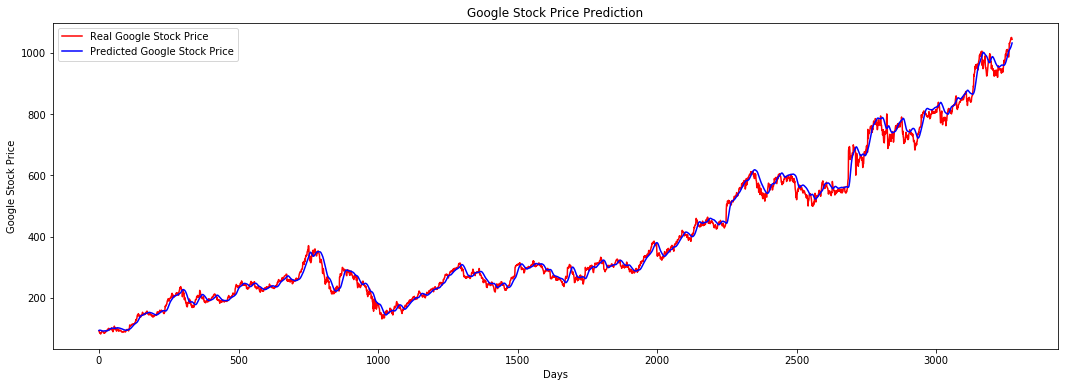

In [22]:
plt.figure(figsize = (18,6))
plt.plot(training_set[60:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

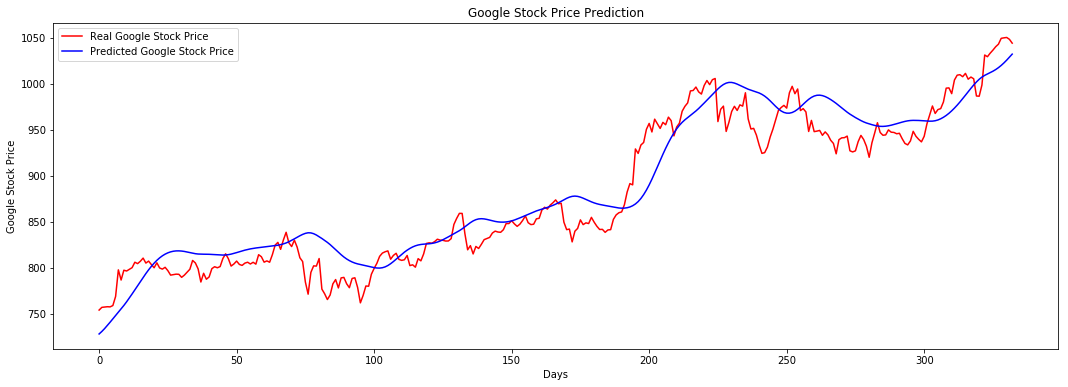

In [33]:
plt.figure(figsize = (18,6))
plt.plot(training_set[3000:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[2940:], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()